(50, 2)
(50, 1)
iteration times: 0
W: [[0.06107988]
 [0.00533374]] 
b: [0.00043014] 
Train Loss: 1912.7668
Test Loss: 2417.2542

iteration times: 100000
W: [[  6.9773397]
 [-61.67483  ]] 
b: [2.1094518] 
Train Loss: 11.927387
Test Loss: 5.6741076

iteration times: 200000
W: [[  7.393621]
 [-71.434616]] 
b: [3.545431] 
Train Loss: 3.6404152
Test Loss: 2.003721

iteration times: 300000
W: [[  7.4689355]
 [-72.93074  ]] 
b: [4.8589907] 
Train Loss: 3.2718382
Test Loss: 2.1189473

iteration times: 400000
W: [[  7.4667892]
 [-73.18085  ]] 
b: [6.147314] 
Train Loss: 3.1664438
Test Loss: 2.092778

iteration times: 500000
W: [[  7.478255]
 [-73.17024 ]] 
b: [7.3967485] 
Train Loss: 3.031329
Test Loss: 2.2835078

iteration times: 600000
W: [[  7.448416]
 [-73.19227 ]] 
b: [8.630894] 
Train Loss: 2.946112
Test Loss: 2.0318832

iteration times: 700000
W: [[  7.4614797]
 [-73.16301  ]] 
b: [9.838584] 
Train Loss: 2.844535
Test Loss: 2.2806084

iteration times: 800000
W: [[  7.462371]
 [-73.14663 

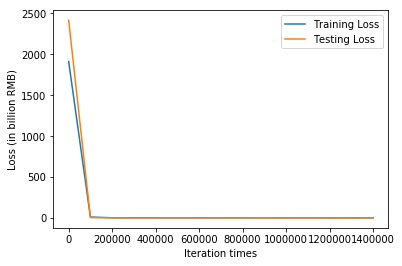

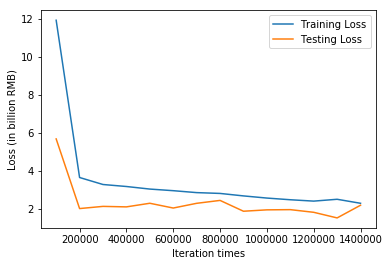

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Try to find value for W and b to compute y_data = x_data * W + b  

# Define dimensions
d = 2    # Size of the parameter space
N = 50 # Number of data sample

# Model parameters
W = tf.Variable(tf.zeros([d, 1], tf.float32), name="weights")
b = tf.Variable(tf.zeros([1], tf.float32), name="biases")

# Model input and output
x = tf.placeholder(tf.float32, shape=[None, d])
y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis
linear_regression_model = tf.add(tf.matmul(x, W), b)
# cost/loss function
loss = tf.reduce_mean(tf.square(linear_regression_model - y)) / (2*N)

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00015)
train = optimizer.minimize(loss)

training_filename = "dataForTraining.txt"
testing_filename = "dataForTesting.txt"
training_dataset = np.loadtxt("dataForTraining.txt")
testing_dataset = np.loadtxt("dataForTesting.txt")
x_train = np.array(training_dataset[:,:2])
y_train = np.array(training_dataset[:,2:3])
x_test = np.array(testing_dataset[:,:2])
y_test = np.array(testing_dataset[:,2:3])
print(x_train.shape)
print(y_train.shape)

save_step_loss = {"step":[],"train_loss":[],"test_loss":[]}# 保存step和loss用于可视化操作

# mini_batch_size = 5
# n_batch = N // mini_batch_size + (N % mini_batch_size != 0)
# print(n_batch)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # reset values to wrong
    steps = 1500000
    for i in range(steps):
#         i_batch = (i % n_batch)*mini_batch_size
#         batch = x_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
        random_index = np.random.choice(N)
        sess.run(train, {x: [x_train[random_index]], y:[y_train[random_index]]})
        if i % 100000 == 0:
            # evaluate training accuracy
            print("iteration times: %s" % i)
            curr_W, curr_b, curr_train_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
            print("W: %s \nb: %s \nTrain Loss: %s" % (curr_W, curr_b, curr_train_loss))
            # Accuracy computation
            curr_test_loss = sess.run(loss,{x:x_test,y:y_test})
            print("Test Loss: %s\n" % curr_test_loss)
            save_step_loss["step"].append(i)
            save_step_loss["train_loss"].append(curr_train_loss)
            save_step_loss["test_loss"].append(curr_test_loss)

#画图损失函数变化曲线
plt.plot(save_step_loss["step"],save_step_loss["train_loss"],label='Training Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss (in billion RMB)')
plt.plot(save_step_loss["step"],save_step_loss["test_loss"],label='Testing Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][1:],save_step_loss["train_loss"][1:],label='Training Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss (in billion RMB)')
plt.plot(save_step_loss["step"][1:],save_step_loss["test_loss"][1:],label='Testing Loss')
plt.legend()
plt.show()